In [1]:
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [2]:
import pandas as pd
output_path = '/Volumes/hex/ST-1871742707-res/'
p = pd.read_csv(output_path + 'ST-1871742707_1.0.csv')

In [3]:
p = p.drop(['alc','cig', 'period', 'work_time', 'day_sleep', 'window'], axis=1).astype(float)

Index(['time', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std',
       'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'SmoothedAirPressure', 'SAP_std',
       'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std',
       'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'mood',
       'tense', 'tired', 'rumination', 'socialize', 'socialize_val',
       'sport_time', 'phq_1', 'phq_2'],
      dtype='object')

In [4]:
train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [115]:
y = p[['phq_1']] 
train_set_st, test_set_st = train_test_split(p, stratify=y, test_size=0.25, random_state=42, shuffle=True)

In [116]:
X_train_st = train_set_st.loc[:,'accX':'sport_time']
y_train_st_1 = train_set_st.loc[:, ['phq_1']].values.ravel()
y_train_st_2 = train_set_st.loc[:, ['phq_2']].values.ravel()

X_test_st = test_set_st.loc[:,'accX':'sport_time']
y_test_st_1 = test_set_st[['phq_1']].values.ravel()
y_test_st_2 = test_set_st[['phq_2']].values.ravel()

In [275]:
X_train_st.columns

Index(['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX',
       'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'SmoothedAirPressure', 'SAP_std',
       'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std',
       'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'mood',
       'tense', 'tired', 'rumination', 'socialize', 'socialize_val',
       'sport_time'],
      dtype='object')

In [5]:
p.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,ple_std,mood,tense,tired,rumination,socialize,socialize_val,sport_time,phq_1,phq_2
0,1539718734,2.34,3.52,-2.90,4.19,2.65,4.19,-1.43,82.50,0.31,...,542224.77,2,3,3,8,23,81,95,9,9
1,1539718794,4.36,4.74,-4.58,3.53,-1.59,3.53,-1.05,77.83,1.89,...,637598.79,2,3,3,8,23,81,95,9,9
2,1539718854,2.99,5.40,-6.32,4.28,0.48,4.28,-0.50,96.74,0.23,...,442787.83,2,3,3,8,23,81,95,9,9
3,1539718914,4.92,4.19,-5.86,4.15,0.95,4.15,0.02,80.78,-1.10,...,357518.78,2,3,3,8,23,81,95,9,9
4,1539718973,-6.47,2.59,-6.80,2.64,-1.51,2.64,0.11,27.43,0.40,...,123124.10,2,3,3,8,23,81,95,9,9


In [6]:
X_train = train_set.loc[:,'accX':'sport_time']
y_train_1 = train_set.loc[:, ['phq_1']].values.ravel()
y_train_2 = train_set.loc[:, ['phq_2']].values.ravel()

X_test = test_set.loc[:,'accX':'sport_time']
y_test_1 = test_set[['phq_1']].values.ravel()
y_test_2 = test_set[['phq_2']].values.ravel()

In [67]:
time = train_set[['time']].values.ravel()
time_test = test_set[['time']].values.ravel()

In [117]:
time_st = train_set_st[['time']].values.ravel()
time_st_test = test_set_st[['time']].values.ravel()

In [7]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [163]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler_st = StandardScaler()
X_train_st_scaled = scaler_st.fit_transform(X_train_st)
X_test_st_scaled = scaler_st.transform(X_test_st)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [194]:
parameters = {'epsilon':[0,0.1,0.2,0.5,1],
               'tol':[1e-1, 1e-3,1e-5],
              'C':[1, 1.5, 10, 50]
              }

In [195]:
from sklearn.model_selection import GridSearchCV

svr = LinearSVR(random_state=42)
regressor_st = GridSearchCV(svr, parameters, n_jobs=-1)
regressor_st

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [196]:
regressor_st.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [197]:
regressor_st.best_params_

{'C': 1, 'epsilon': 0.5, 'tol': 0.001}

In [198]:
regressor_st.best_estimator_

LinearSVR(C=1, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.001, verbose=0)

In [199]:
pred_test_st = regressor_st.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

0.6924216143677892

In [200]:
pred_train_st = regressor_st.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

0.6953952668846856

In [271]:
svr.coef_

AttributeError: 'LinearSVR' object has no attribute 'coef_'

In [203]:
model = regressor_st.best_estimator_

In [272]:
model.coef_

array([-8.01549339e-02,  1.17975844e-02, -1.09961620e-02, -2.22833721e-03,
       -8.02851507e-03, -2.22833721e-03,  3.78184455e-04,  4.69264912e-02,
       -6.76195450e-03, -2.51249463e-02,  9.39656949e-03, -9.71845086e-03,
        1.37583303e-02,  1.01929008e-02,  1.08348298e+00, -3.25809305e-01,
        2.28175697e+00,  6.64176857e-03,  2.58816527e-02, -5.18981877e-03,
        1.17576307e+00,  3.51558104e-01,  1.11619977e-02, -8.49214719e-03,
       -2.09415360e-01, -2.87548505e-01, -3.00845307e-01,  1.71046066e+00,
       -1.82223611e-01, -3.08074189e-01, -2.24261749e-02])

In [257]:
len(model.support_)

33916

In [259]:
model.intercept_

array([4.00832896])

In [217]:
patient = train_set_st.copy()

In [227]:
patient.columns

Index(['time', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std',
       'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'SmoothedAirPressure', 'SAP_std',
       'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std',
       'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'mood',
       'tense', 'tired', 'rumination', 'socialize', 'socialize_val',
       'sport_time', 'phq_1', 'phq_2'],
      dtype='object')

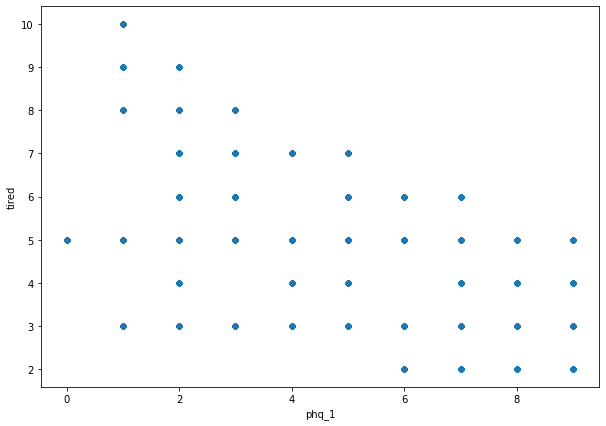

In [232]:
patient.plot(kind='scatter', x='phq_1', y='tired', figsize=(10,7))

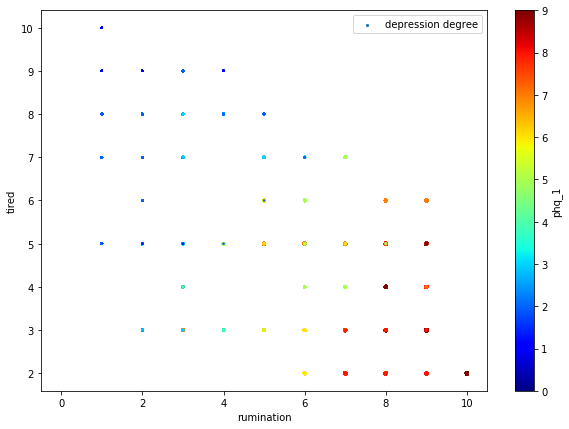

In [292]:
patient.plot(kind='scatter', x='rumination', y='tired', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)


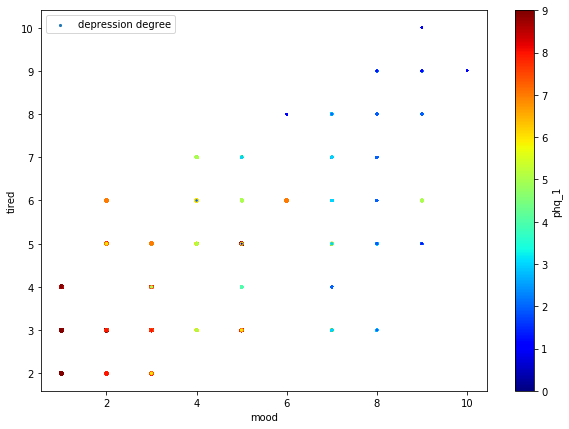

In [291]:
patient.plot(kind='scatter', x='mood', y='tired', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

In [233]:
corr_matrix = patient.corr()

In [234]:
corr_matrix['phq_1'].sort_values(ascending=False)

phq_1                            1.000000
phq_2                            0.957172
rumination                       0.908571
sport_time                       0.215253
AirTemperature                   0.076010
accY                             0.056445
AirPressure                      0.045882
SmoothedAirPressure              0.045879
accZ                             0.039555
gyrZ                             0.014631
heartR_std                       0.011317
AT_std                           0.006610
accZ_std                         0.001225
accY_std                         0.001225
UBA_std                          0.001063
ple_std                          0.000167
gyrX                            -0.000280
AP_std                          -0.001582
gyrX_std                        -0.002410
SAP_std                         -0.002518
gyrY                            -0.009395
accX_std                        -0.011662
gyrZ_std                        -0.013112
gyrY_std                        -0

In [270]:
socialise_scaled = scaler_st.fit_transform(test_set_st[['socialize']])
socialize_val_scaled = scaler_st.fit_transform(test_set_st[['socialize_val']])
sport_time_scaled = scaler_st.fit_transform(test_set_st[['sport_time']])
mood_scaled = scaler_st.fit_transform(test_set_st[['mood']])
tense_scaled = scaler_st.fit_transform(test_set_st[['tense']])

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/skl

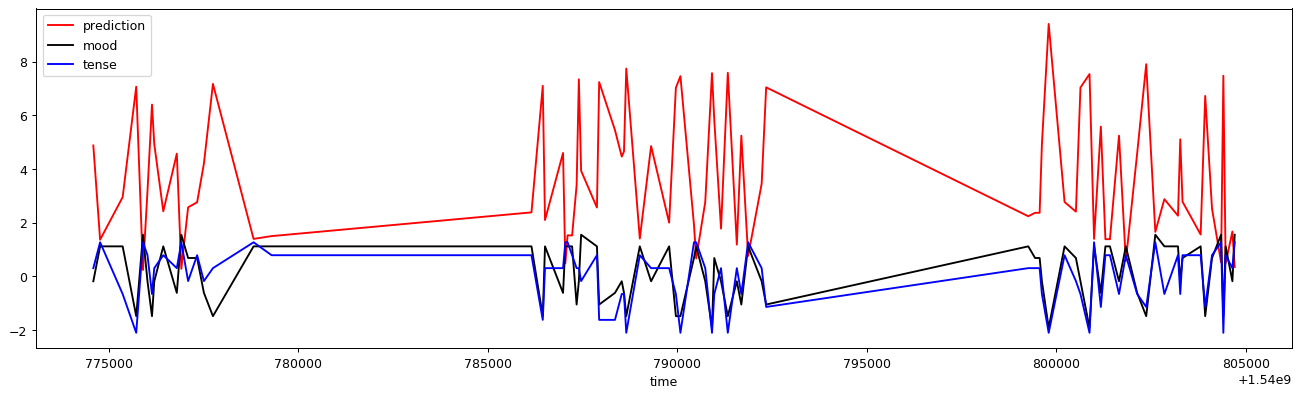

In [288]:
from matplotlib import pyplot
%matplotlib inline
s = 900
e = 980
xaxis = time_st_test[s:e]
yaxis = y_test_st_1[s:e]
yaxis2 = pred_test_st[s:e]
yaxis3 = socialise_scaled[s:e]
yaxis4 = socialize_val_scaled[s:e]
yaxis5 = sport_time_scaled[s:e]
yaxis6 = mood_scaled[s:e]
yaxis7 = tense_scaled[s:e]

# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
# pyplot.plot(xaxis, yaxis, color='red', label='phq_1')


pyplot.plot(xaxis, yaxis2, color='red', label='prediction')
# pyplot.plot(xaxis, yaxis3, color='green', label='socialize')
# pyplot.plot(xaxis, yaxis4, color='cyan', label='socialize_val')
# pyplot.plot(xaxis, yaxis5, color='magenta', label='sport_time')
pyplot.plot(xaxis, yaxis6, color='black', label='mood')
pyplot.plot(xaxis, yaxis7, color='blue', label='tense')
pyplot.xlabel('time')

pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

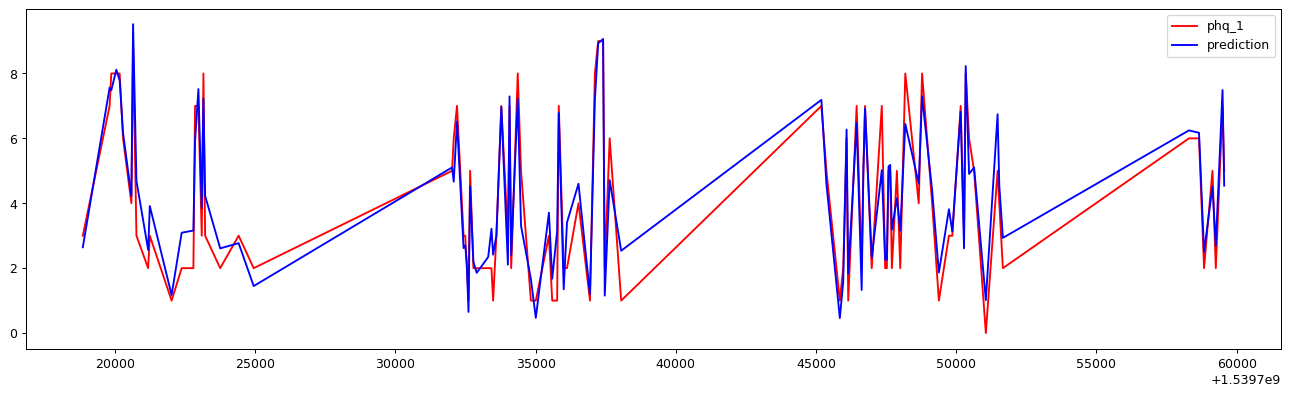

In [135]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_st_test[:100]
yaxis = y_test_st_1[:100]
yaxis2 = pred_test_st[:100]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

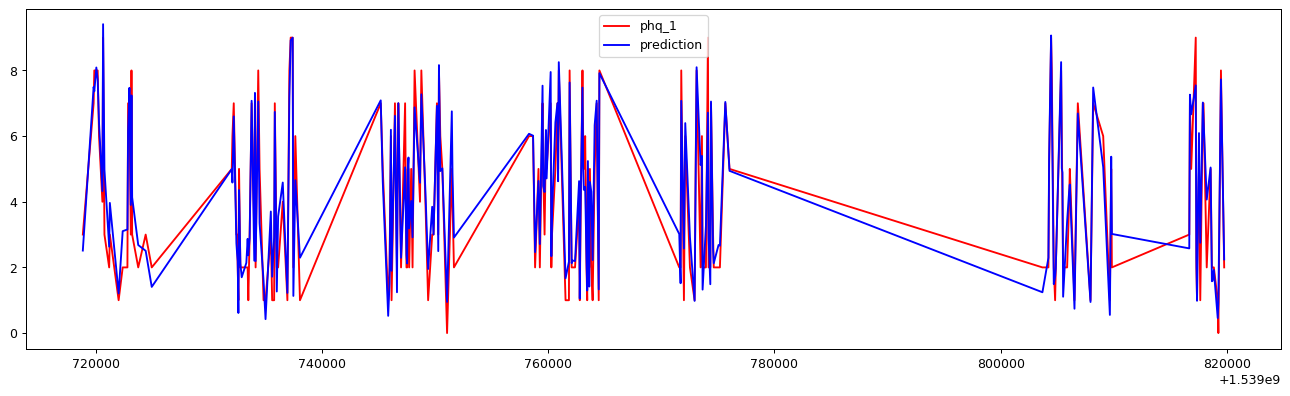

In [278]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_st_test[:200]
yaxis = y_test_st_1[:200]
yaxis2 = pred_test_st[:200]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()

In [8]:
from sklearn.svm import LinearSVR
regressor_3 = LinearSVR(random_state=0, tol=1e-5)
regressor_3.fit(X_train_scaled, y_train_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=1e-05, verbose=0)

In [89]:
from sklearn.metrics import mean_absolute_error

pred_3 = regressor_3.predict(X_train_scaled)
svr_mae = mean_absolute_error(y_train_1, pred_3)
svr_mae

0.6865546403270868

In [79]:
from sklearn.metrics import mean_absolute_error

pred_test_3 = regressor_3.predict(X_test_scaled)
svr_mae = mean_absolute_error(y_test_1, pred_test_3)
svr_mae

0.682862391153235

In [80]:
print(regressor_3.score(X_test_scaled,y_test_1))

0.8709064741028715


In [85]:
index = list(x for x in range(pred_3.shape[0]))
dictionary = {'time': time_test, 'phq-test-1': y_test_1, 'predictions': pred_test_3}
df = pd.DataFrame(dictionary, index=index)

In [87]:
# sort time
time_sorted = df[['time']].sort_values(by ='time')
time_sorted

,time
19536,1539719153
19300,1539720108
15997,1539720168
19237,1539720347
11871,1539720766
...,...
15491,1565806135
14029,1565806195
13135,1565806554
1267,1565806733


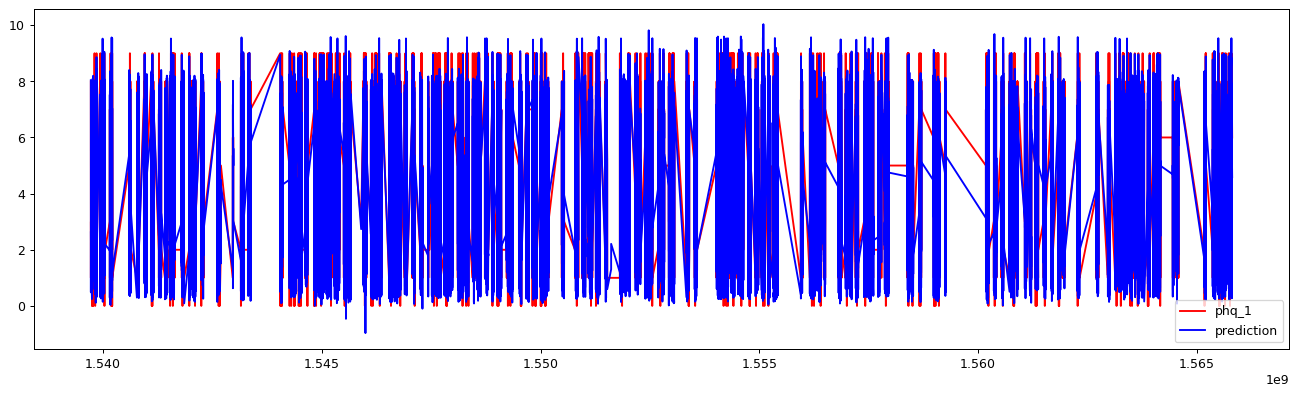

In [88]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_sorted
yaxis = df[['phq-test-1']]
yaxis2 = df[['predictions']]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

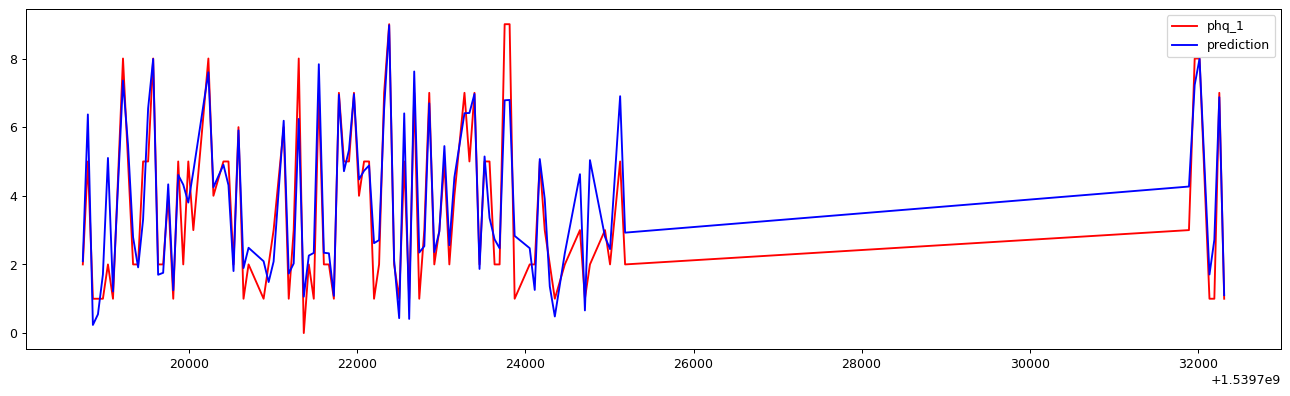

In [134]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time[:100]
yaxis = y_train_1[:100]
yaxis2 = pred_3[:100]
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()


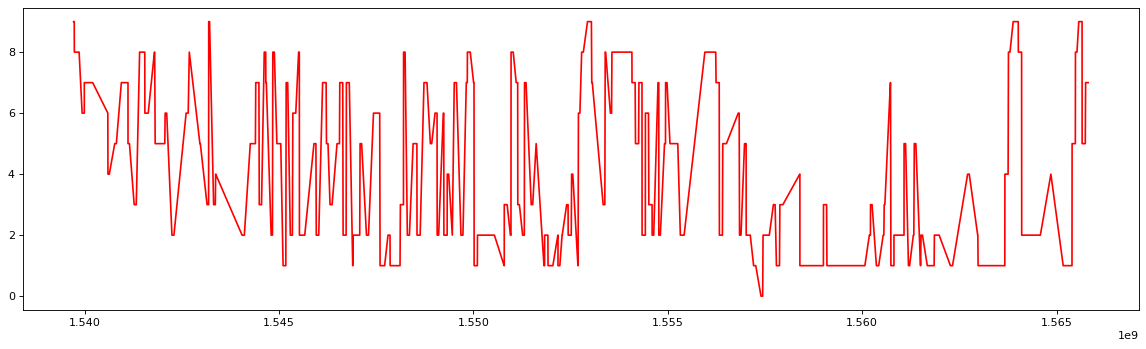

In [110]:
from matplotlib import pyplot
%matplotlib inline
xaxis = p[['time']]
yaxis = p[['phq_1']]
# yaxis2 = p[['phq_2']]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
# pyplot.plot(xaxis, yaxis2, color='blue', label='phq_2')
# pyplot.plot(xaxis, avg, color='green', label='avg')